In [1]:
# Fashion-MNIST Classification with CNN (Functional API)

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import gc


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

In [3]:
# Train-validation split
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

In [5]:
# Define CNN model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
# Train
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=128, callbacks=[early_stopping])

Epoch 1/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.6871 - loss: 0.9678 - val_accuracy: 0.7036 - val_loss: 0.9874
Epoch 2/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.8348 - loss: 0.4552 - val_accuracy: 0.8876 - val_loss: 0.3050
Epoch 3/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.8609 - loss: 0.3863 - val_accuracy: 0.8940 - val_loss: 0.2766
Epoch 4/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.8718 - loss: 0.3529 - val_accuracy: 0.9036 - val_loss: 0.2613
Epoch 5/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.8801 - loss: 0.3253 - val_accuracy: 0.9096 - val_loss: 0.2365
Epoch 6/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.8864 - loss: 0.3081 - val_accuracy: 0.9088 - val_loss: 0.2413
Epoch 7/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.8931 - loss: 0.2922 - val_accuracy: 0.9064 - val_loss: 0.2570
Epoch 8/15
430/430 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.8962 - loss: 0.2834 - 

In [8]:
# Save the model in HDF5 format (.h5)
model.save("models/fashion_mnist_cnn.h5")


In [9]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9177 - loss: 0.2410


[0.2354845255613327, 0.91839998960495]

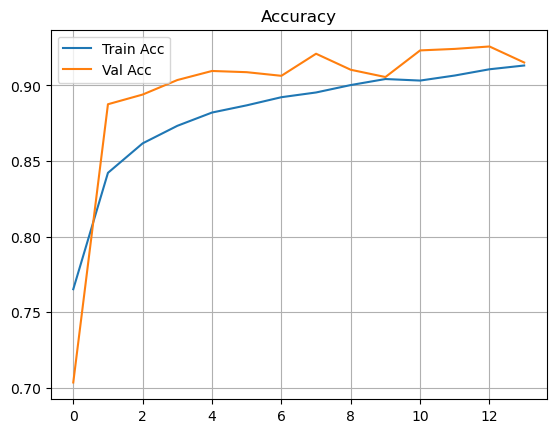

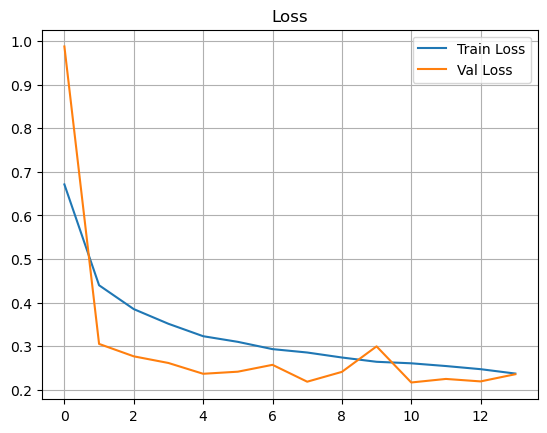

In [10]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


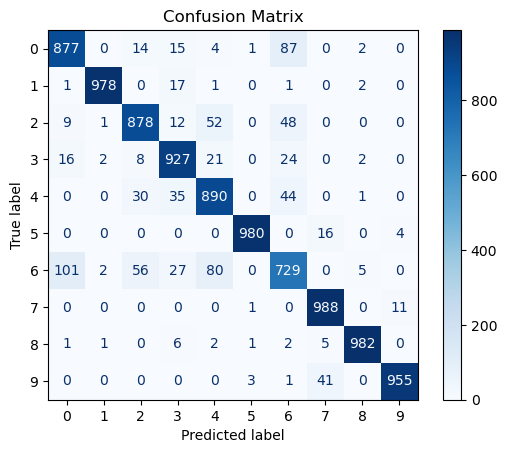

20320

In [11]:
# Confusion matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

gc.collect()